In [9]:
from emir import GANDeficiencyArgs, GANDeficiencyEstimator, GANTrickedDeficiencyEstimator, WassersteinDeficiencyEstimator
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn as sk
from sklearn.datasets import make_blobs

import matplotlib.patches as mpatches

# create logger
import logging
logging.basicConfig(level=logging.INFO)


In [10]:
# Make two embeddings datasets XU, XZ with 2D embeddings

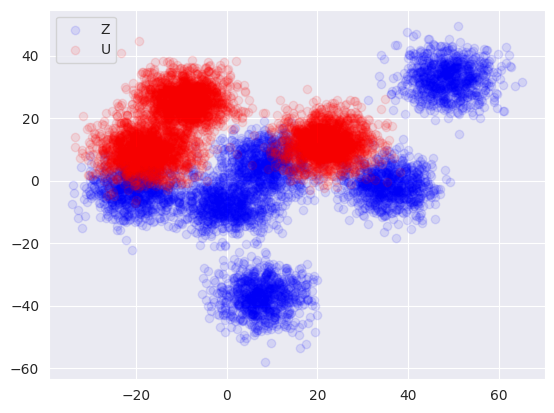

In [17]:
# Make 2 2d gaussians with different means and covariances


XZ = make_blobs(n_samples=5000, n_features=2, centers=6, cluster_std=5.0, center_box=(-50, 50), shuffle=True, random_state=None)
XU = make_blobs(n_samples=5000, n_features=2, centers=3, cluster_std=5.0, center_box=(-50, 50), shuffle=True, random_state=None)

# plot the data
plt.scatter(XZ[0][:,0], XZ[0][:,1], c="blue", alpha=0.1, label="Z")
plt.scatter(XU[0][:,0], XU[0][:,1], c="red", alpha=0.1, label="U")

plt.legend()



In [18]:
args = GANDeficiencyArgs(device='cpu', 
                         disc_clip=0.01, 
                         gen_hidden_dim=32, 
                         gen_n_layers=10,
                         critic_n_layers=5,
                         critic_hidden_dim=8,
                         critic_repeats=5, 
                         gan_n_epochs=100, 
                         gen_lr=1e-4, 
                         critic_lr=1e-4,
                         gan_batch_size=64,
                         )
estimator = WassersteinDeficiencyEstimator(args, x_dim=2, y_dim=2)


In [19]:
U = torch.tensor(XU[0], dtype=torch.float32)
Z = torch.tensor(XZ[0], dtype=torch.float32)

estimator.fit_estimator(Z, U)

INFO:emir.estimators.deficiency_estimator:Epoch 1/100, Critic loss: 3.7252903539730653e-10, Generator loss: -0.010202749632298946
INFO:emir.estimators.deficiency_estimator:Epoch 2/100, Critic loss: -6.146728903644316e-09, Generator loss: -0.010204307734966278
INFO:emir.estimators.deficiency_estimator:Epoch 3/100, Critic loss: -1.8067657592268915e-08, Generator loss: -0.010204675607383251
INFO:emir.estimators.deficiency_estimator:Epoch 4/100, Critic loss: -3.408640480984104e-08, Generator loss: -0.010205455124378204
INFO:emir.estimators.deficiency_estimator:Epoch 5/100, Critic loss: -5.029141902923584e-08, Generator loss: -0.010205855593085289
INFO:emir.estimators.deficiency_estimator:Epoch 6/100, Critic loss: -9.760260866187309e-08, Generator loss: -0.010206012055277824
INFO:emir.estimators.deficiency_estimator:Epoch 7/100, Critic loss: -9.592622518539429e-08, Generator loss: -0.01020654384046793
INFO:emir.estimators.deficiency_estimator:Epoch 8/100, Critic loss: -1.5497207073167374e-0

In [20]:

Uchap = estimator.gen(Z).detach().numpy()

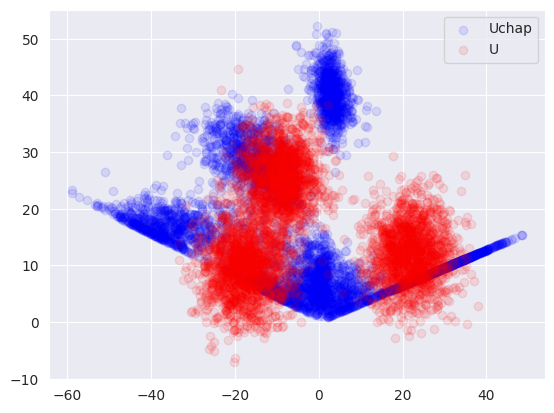

In [21]:
plt.scatter(Uchap[:,0], Uchap[:,1], c="blue", alpha=0.1, label="Uchap")
plt.scatter(XU[0][:,0], XU[0][:,1], c="red", alpha=0.1, label="U")
plt.legend()

Text(0.5, 1.0, 'Generator loss')

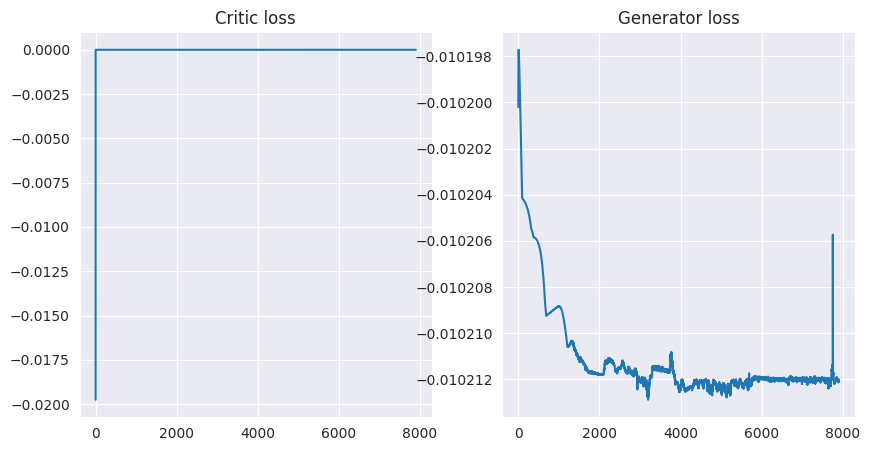

In [22]:

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# print recorded losses
crit_loss = estimator.recorded_critic_loss
gen_loss = estimator.recorded_gen_loss

ax[0].plot(crit_loss, label="Critic loss")
ax[1].plot(gen_loss, label="Generator loss")

ax[0].set_title("Critic loss")
ax[1].set_title("Generator loss")
